<center><img src="http://identity.stanford.edu/overview/images/emblems/SU_BlockStree_2color.png" width="200" style="display: inline-block"><img src="http://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Main_fermi_logo_HI.jpg/682px-Main_fermi_logo_HI.jpg" width="200" style="display: inline-block"><img src="http://www.astro.wisc.edu/~russell/HAWCLogo.png" width="200" style="display: inline-block"></center>
<h1> Example of a spectral analysis with 3ML</h1>
<br/>
Giacomo Vianello (Stanford University)
<a href="mailto:giacomov@stanford.edu">giacomov@stanford.edu</a>

<h2>IPython Notebook setup. </h2>
This is needed only if you are using the <a href=http://ipython.org/notebook.html>IPython Notebook</a> on your own computer, it is NOT needed if you are on threeml.stanford.edu.
This line will activate the support for inline display of matplotlib images:

In [2]:
import matplotlib

%matplotlib notebook
from lat_transient_builder import TransientLATDataBuilder

<h2>Import 3ML and see the available plug-ins</h2>

In [5]:
from threeML import *

In [4]:
get_available_plugins()

Available plugins:

DispersionSpectrumLike for General binned spectral data with energy dispersion
FermiLATLike for Fermi LAT (standard classes)
OGIPLike for All OGIP-compliant instruments
FermipyLike for Fermi LAT (with fermipy)
UnresolvedExtendedXYLike for n.a.
PhotometryLike for Generic photometric data
SwiftXRTLike for Swift XRT
SpectrumLike for General binned spectral data


<h2>Define some general features for the source of interest</h2>
Here we define a name and the coordinates (Equatorial J2000). In this case, we are analyzing a GRB:

In [6]:
#The following definitions are for convenience

triggerName = 'bn080916009'

#Data are in the current directory



In [7]:
gbm_cat = FermiGBMBurstCatalog()


gbm_cat.query_sources('GRB080916009')




name,ra,dec,trigger_time,t90
object,float64,float64,float64,float64
GRB080916009,119.800,-56.600,54725.0088613,62.977


In [8]:
detectors = gbm_cat.get_detector_information()['GRB080916009']['detectors']
bkg_interval = gbm_cat.get_detector_information()['GRB080916009']['background']['full'].split(',')



In [9]:
gbm_download = download_GBM_trigger_data('bn080916009', detectors=detectors)


WARNING UserWarning: The TTE file /workdir/coding/threeML/examples/glg_tte_n3_bn080916009_v01.fit.gz contains duplicate time tags and is thus invalid. Contact the FSSC 


WARNING UserWarning: The TTE file %s was not sorted in time but contains no duplicate events. We will sort the times, but use caution with this file. Contact the FSSC.


WARNING UserWarning: The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) not found.",)available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'


WARNING UserWarning: No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming TLMIN=1


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.26700019836)


WARNING UserWarning: The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) not found.",)available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'


WARNING RuntimeWarning: Minimum MC energy (5.0) is larg

Auto-determined polynomial order: 0




Unbinned 0-order polynomial fit with the Nelder-Mead method




<IPython.core.display.Javascript object>


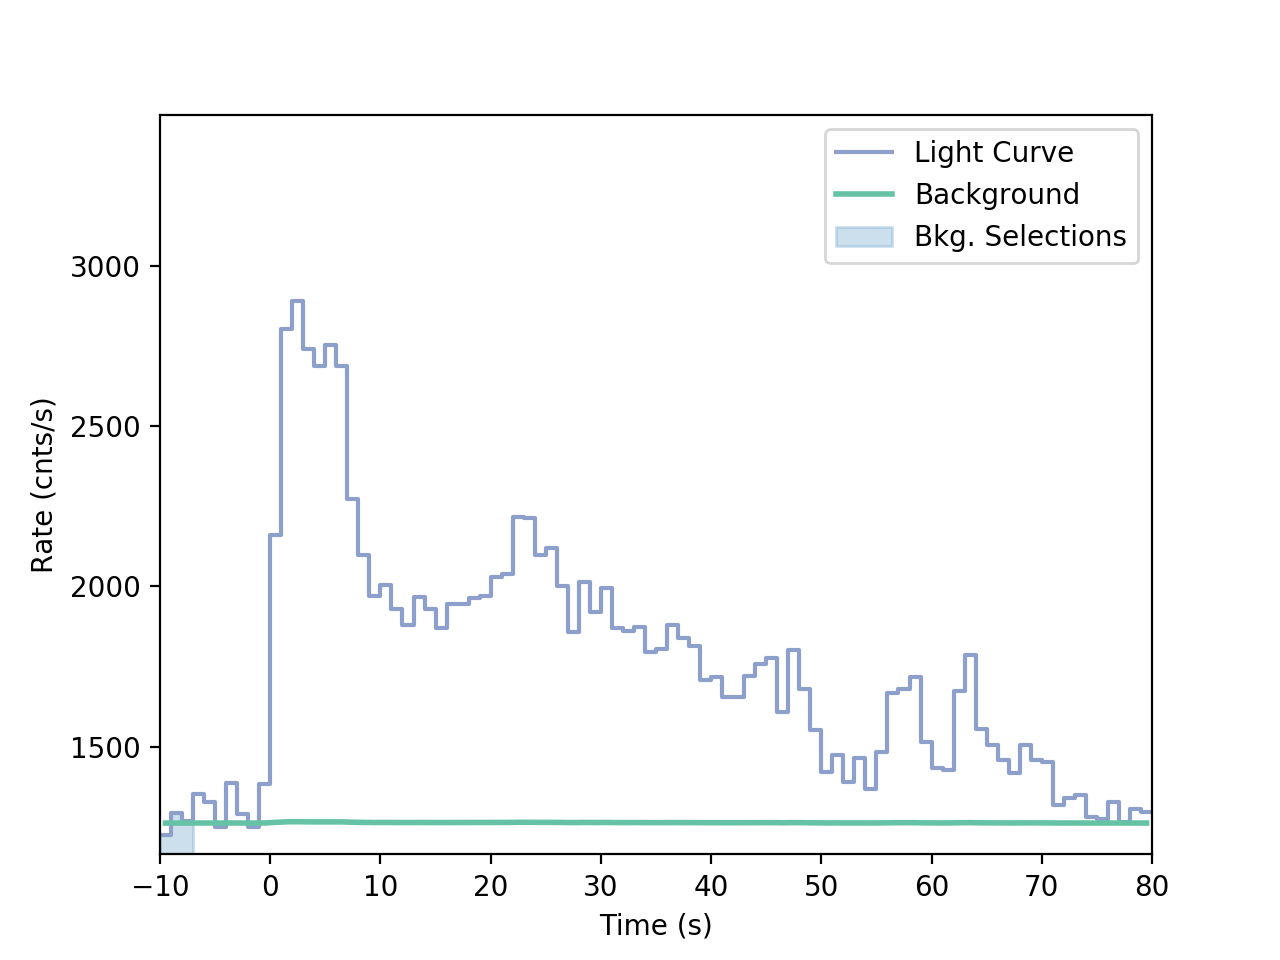


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.36999988556)


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.36999988556)


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.36999988556)


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.36999988556)


WARNING UserWarning: The time interval -40.100000--6.250000 started before the first arrival time (-25.943522), so we are changing the intervals to -25.943522--6.250000



Auto-determined polynomial order: 0




Unbinned 0-order polynomial fit with the Nelder-Mead method




<IPython.core.display.Javascript object>


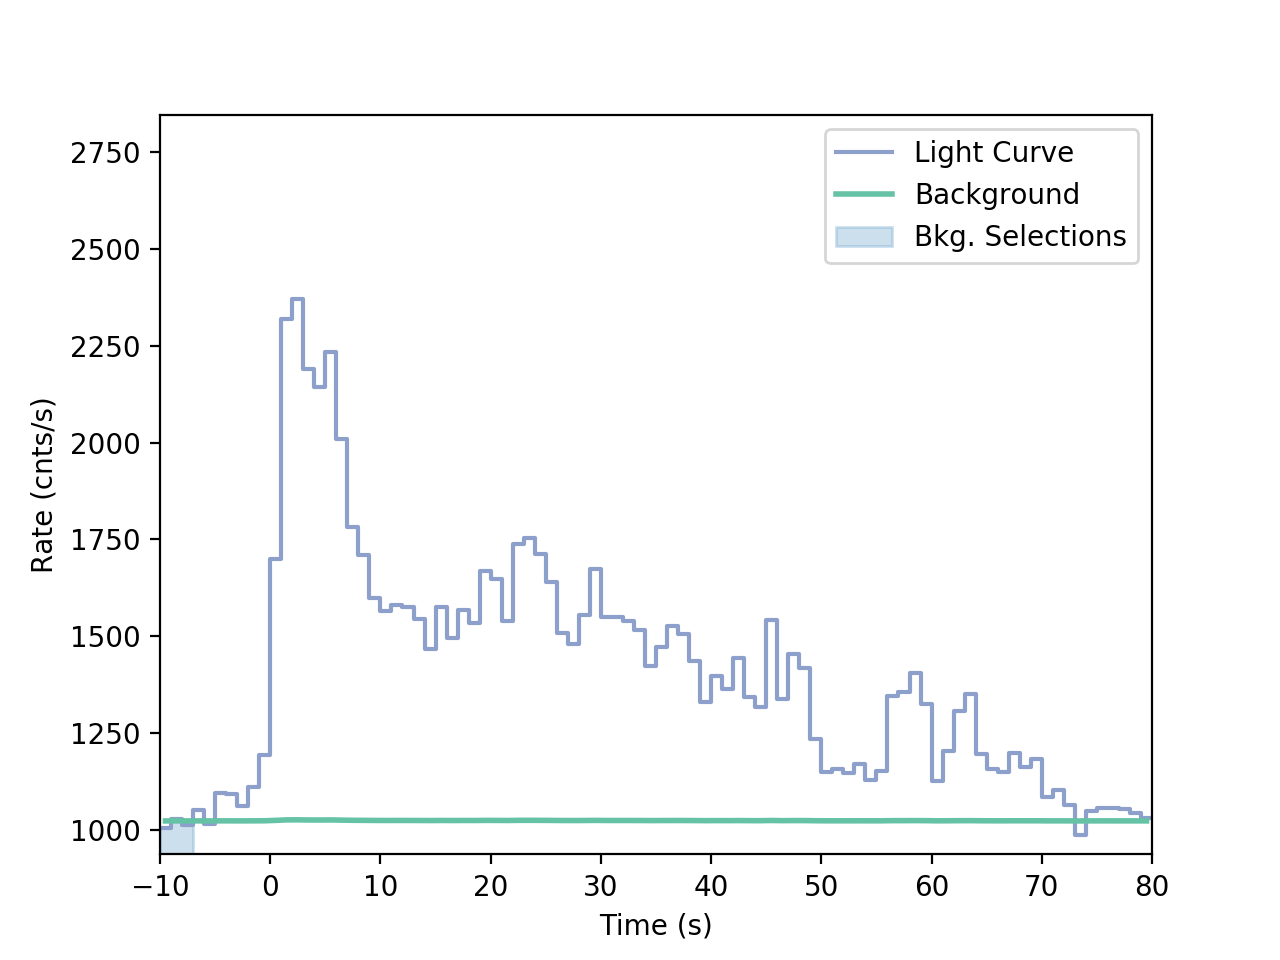


WARNING UserWarning: The TTE file /workdir/coding/threeML/examples/glg_tte_b0_bn080916009_v01.fit.gz contains duplicate time tags and is thus invalid. Contact the FSSC 


WARNING UserWarning: The time interval -40.100000--6.250000 started before the first arrival time (-25.943228), so we are changing the intervals to -25.943228--6.250000



Auto-determined polynomial order: 1




Unbinned 1-order polynomial fit with the Nelder-Mead method




<IPython.core.display.Javascript object>


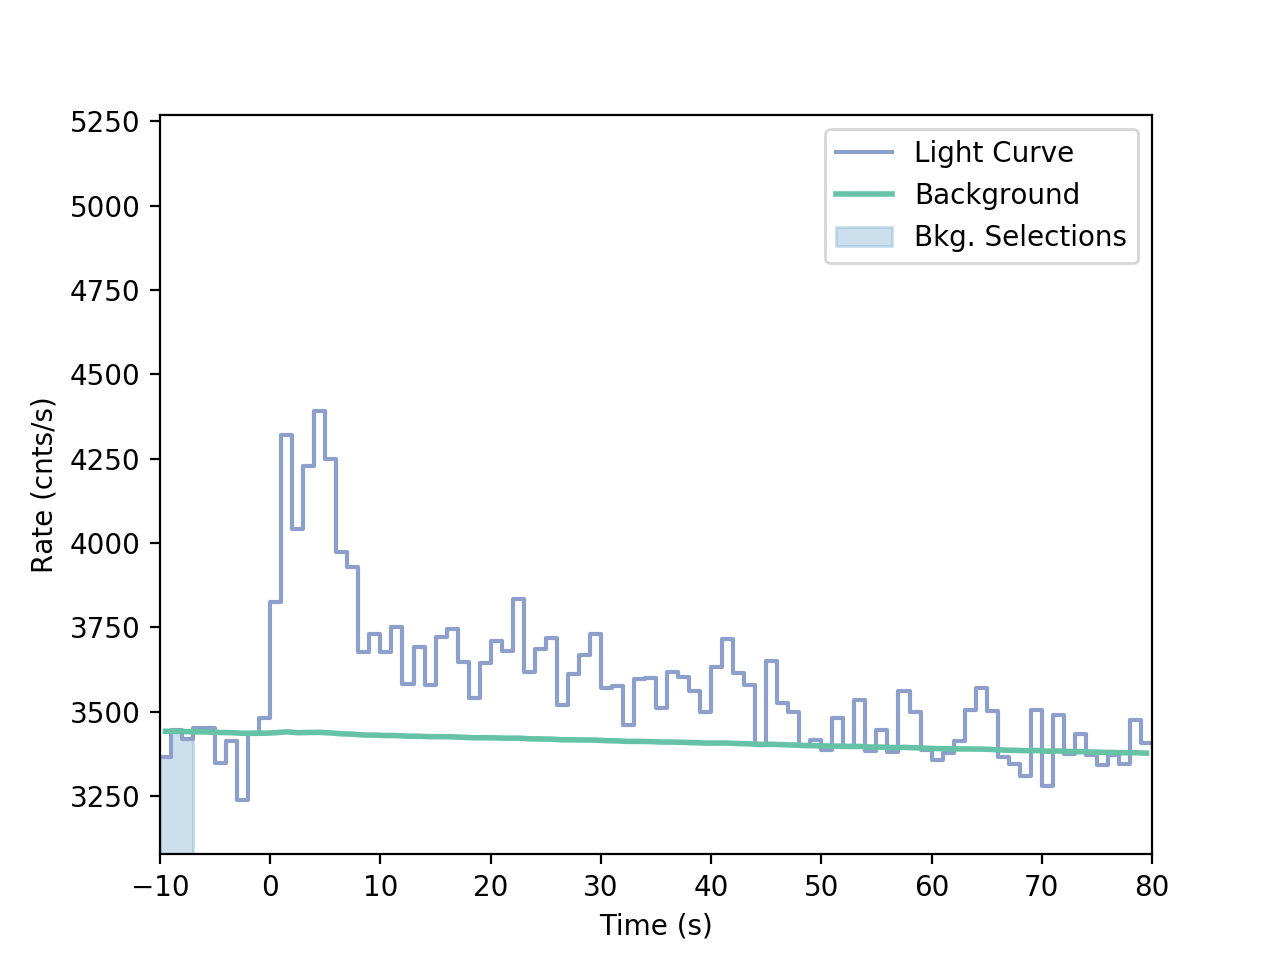

In [10]:
gbm_time_series = {}
for det in detectors:
    
    
    ts = TimeSeriesBuilder.from_gbm_tte(det, tte_file=gbm_download[det]['tte'],rsp_file=gbm_download[det]['rsp'] )
    ts.set_background_interval(*bkg_interval)
    ts.view_lightcurve(-10,80);
    
    gbm_time_series[det] = ts
    

In [54]:
plugins = []
tstart = 3.6
tstop = 7.7


for k, v in gbm_time_series.items():
    
    v.set_active_time_interval('%f-%f' %(tstart, tstop))
    
    plugin = v.to_spectrumlike()
    
    if k[0] == 'b':
        
        plugin.set_active_measurements('250-30000')
        
    else:
        
        plugin.set_active_measurements('10-900')
        
        
    plugins.append(plugin)
        
        
    
    
    
    
    

Auto-probed noise models:
- observation: poisson
- background: gaussian
Range 250-30000 translates to channels 1-119
Now using 119 channels out of 128
Auto-probed noise models:
- observation: poisson
- background: gaussian
Range 10-900 translates to channels 6-124
Now using 119 channels out of 128
Auto-probed noise models:
- observation: poisson
- background: gaussian
Range 10-900 translates to channels 6-123
Now using 118 channels out of 128



WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.26700019836)


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.36999988556)



<h2>Setup the LAT plugin and data</h2>
Here we instanciate a plugin to handle Fermi/LAT data (if you have the Fermi Science Tools installed, and hence the LAT plugin is available):

In [31]:
analysis_builder = TransientLATDataBuilder('080916009')



analysis_builder.outfile.value = 'test'
analysis_builder.roi.value = 5.
analysis_builder.tstarts.value = '%s' % tstart
analysis_builder.tstops.value = '%s' % tstop
analysis_builder.galactic_model.value = 'template'
analysis_builder.particle_model.value = 'isotr template'

analysis_builder.display()

outfile                          test
roi                                 5
tstarts                           3.6
tstops                            7.7
zmax                              100
emin                              100
emax                           100000
irf                              auto
galactic_model               template
particle_model         isotr template
tsmin                              20
strategy                         time
thetamax                          180
spectralfiles                      no
liketype                     unbinned
optimizeposition                   no
datarepository        /root/FermiData
ltcube                               
expomap                              
ulphindex                          -2
fgl_mode                         fast
filter_GTI                      False
likelihood_profile              False
remove_fits_files               False
dtype: object


In [71]:
analysis_builder.datarepository.get_disp_value()

'/root/FermiData'

In [73]:
ls /root/FermiData/bn080916009/

gll_cspec_tr_bn080916009_v00.pha  gll_ft1_tr_bn080916009_v00.fit
gll_cspec_tr_bn080916009_v00.rsp  gll_ft2_tr_bn080916009_v00.fit


In [32]:
lat_obs = analysis_builder.run(recompute_intervals=True)[0]

You have choosen to recompute the time intervals in this folder
The older entries will be moved to tmp_9ded2c57-4f44-4200-8009-3666f7cb7ee7


In [33]:
!ls interval3.6-7.7/

080916009_LAT_skymap_3.6-7.7.fit	     gll_iem_v07_cut.fits
080916009_LAT_xmlmodel_3.6-7.7.xml	     gtbin.par
gll_ft1_tr_bn080916009_v00_filt_expomap.fit  gtdiffrsp.par
gll_ft1_tr_bn080916009_v00_filt.fit	     gtexpmap.par
gll_ft1_tr_bn080916009_v00_filt_likeRes.xml  gtltcube.par
gll_ft1_tr_bn080916009_v00_filt_ltcube.fit   gtmktime.par
gll_ft1_tr_bn080916009_v00_mkt.fit	     gtselect.par


In [34]:
!cp /root/FermiData/bn080916009/gll_ft2_tr_bn080916009_v00.fit ./interval3.6-7.7/

In [33]:

lat_obs

time interval                                        10.000-30.000
event_file       interval10.0-30.0/gll_ft1_tr_bn080916009_v00_f...
ft2_file         interval10.0-30.0/gll_ft2_tr_bn080916009_v00_f...
exposure_map     interval10.0-30.0/gll_ft1_tr_bn080916009_v00_f...
livetime_cube    interval10.0-30.0/gll_ft1_tr_bn080916009_v00_f...

In [55]:
#Let's create an instance of the plugin, if it is available

if is_plugin_available("FermiLATLike"):
    
    LAT = FermiLATLike( "LAT",
                       lat_obs.event_file,
                       'interval3.6-7.7//gll_ft2_tr_bn080916009_v00.fit', 
                       lat_obs.livetime_cube,
                       'unbinned',
                       lat_obs.exposure_map )

else:
    
    print("Plugin for Fermi/LAT is not available")
    
    
plugins.append(LAT)

<h2>Setup of GBM data</h2>
Here we create 3 instances of the plugin which handle GBM data, for 3 different GBM detectors (NaI6, NaI9, BGO1). We also define the channels (or energies) we want to use, by using setActiveMeasurements():

<h2>Create a dataList object to collect all our data</h2>

In [56]:
#This declares which data we want to use. In our case, all that we have already created.

data_list = DataList( *plugins)

<h2>Define our model</h2>
Here we define our spectral model, as well as demonstrate some way to manipulate the parameters of the spectral model.

In [57]:
#Let's use a Band model, a phenomenological model typically used for GRBs
band = Band()
pl = Powerlaw()

#Let's have a look at what we just created
print(band)

  * description: Band model from Band et al., 1993, parametrized with the peak energy
  * formula: $  $
  * parameters:
    * K:
      * value: 0.0001
      * desc: Differential flux at the pivot energy
      * min_value: null
      * max_value: null
      * unit: ''
      * is_normalization: true
      * delta: 1.0e-05
      * free: true
    * alpha:
      * value: -1.0
      * desc: low-energy photon index
      * min_value: -1.5
      * max_value: 3.0
      * unit: ''
      * is_normalization: false
      * delta: 0.1
      * free: true
    * xp:
      * value: 500.0
      * desc: peak in the x * x * N (nuFnu if x is a energy)
      * min_value: 10.0
      * max_value: null
      * unit: ''
      * is_normalization: false
      * delta: 50.0
      * free: true
    * beta:
      * value: -2.0
      * desc: high-energy photon index
      * min_value: -5.0
      * max_value: -1.6
      * unit: ''
      * is_normalization: false
      * delta: 0.2
      * free: true
    * piv:
      * v

In [58]:
#We can modify the initial values for the parameters, 
#as well as their bounds and the delta,
#like this:

band.alpha = -0.8
band.alpha.bounds = (-2,2)
band.alpha.delta = 0.08


pl.K.bounds = (0.,None)
pl.index = -1.7
pl.index.bounds = (None, 0.)
#We could also use this:

# band.alpha.fix()

#to fix a parameter

#Let's verify that the changes have been applied
band

* description: Band model from Band et al., 1993, parametrized with the peak energy
  * formula: $  $
  * parameters:
    * K:
      * value: 0.0001
      * desc: Differential flux at the pivot energy
      * min_value: null
      * max_value: null
      * unit: ''
      * is_normalization: true
      * delta: 1.0e-05
      * free: true
    * alpha:
      * value: -0.8
      * desc: low-energy photon index
      * min_value: -2.0
      * max_value: 2.0
      * unit: ''
      * is_normalization: false
      * delta: 0.08
      * free: true
    * xp:
      * value: 500.0
      * desc: peak in the x * x * N (nuFnu if x is a energy)
      * min_value: 10.0
      * max_value: null
      * unit: ''
      * is_normalization: false
      * delta: 50.0
      * free: true
    * beta:
      * value: -2.0
      * desc: high-energy photon index
      * min_value: -5.0
      * max_value: -1.6
      * unit: ''
      * is_normalization: false
      * delta: 0.2
      * free: true
    * piv:
      * value: 100.0
      * desc: pivot energy
      * min_value: null
      * max_value: null
      * unit: ''
      * is_normalization: false
      * delta: 10.0
      * free: false

In [59]:
#The GRB is a point source. Let's create its model. We will use triggerName as
#its name, and the position declared at the beginning, as well as the band
#model we just modified as its spectrum
GRB = PointSource( triggerName, 0, 0, band )

#Let's have a look at what we just created
GRB

* bn080916009 (point source):
    * position:
      * ra:
        * value: 0.0
        * desc: Right Ascension
        * min_value: 0.0
        * max_value: 360.0
        * unit: deg
        * is_normalization: false
      * dec:
        * value: 0.0
        * desc: Declination
        * min_value: -90.0
        * max_value: 90.0
        * unit: deg
        * is_normalization: false
      * equinox: J2000
    * spectrum:
      * main:
        * Band:
          * K:
            * value: 0.0001
            * desc: Differential flux at the pivot energy
            * min_value: null
            * max_value: null
            * unit: keV-1 s-1 cm-2
            * is_normalization: true
          * alpha:
            * value: -0.8
            * desc: low-energy photon index
            * min_value: -2.0
            * max_value: 2.0
            * unit: ''
            * is_normalization: false
          * xp:
            * value: 500.0
            * desc: peak in the x * x * N (nuFnu if x is a energy)
            * min_value: 10.0
            * max_value: null
            * unit: keV
            * is_normalization: false
          * beta:
            * value: -2.0
            * desc: high-energy photon index
            * min_value: -5.0
            * max_value: -1.6
            * unit: ''
            * is_normalization: false
          * piv:
            * value: 100.0
            * desc: pivot energy
            * min_value: null
            * max_value: null
            * unit: keV
            * is_normalization: false
        * polarization: {}

Now define the likelihood model. The likelihood model can have as many sources as you need to model your region of interest. In this case we use only one source (the GRB). It is important to note that the background for the different instruments is handled by the respective plugins, and must therefore not be included here.

In [60]:
model = Model( GRB )

#We could define as many sources (pointlike or extended) as we need, and
#add them to the model as:
# model = LikelihoodModel ( GRB, OtherSource, OtherSource2, etc ...)


In [61]:
model

Model summary:
==============

                  N
Point sources     1
Extended sources  0
Particle sources  0

Free parameters (4):
--------------------

                                       value min_value max_value  \
bn080916009.spectrum.main.Band.K      0.0001      None      None   
bn080916009.spectrum.main.Band.alpha    -0.8        -2         2   
bn080916009.spectrum.main.Band.xp        500        10      None   
bn080916009.spectrum.main.Band.beta       -2        -5      -1.6   

                                                unit  
bn080916009.spectrum.main.Band.K      keV-1 s-1 cm-2  
bn080916009.spectrum.main.Band.alpha                  
bn080916009.spectrum.main.Band.xp                keV  
bn080916009.spectrum.main.Band.beta                   

Fixed parameters (3):
(abridged. Use complete=True to see all fixed parameters)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

<h2>Create a jointLikelihood object</h2>

In [62]:
#This will create the object which will allow to fit 
#the model.

#We need to pass in the model we want to fit, as well as the
#data we want to use in the fit (through the datalist created
#before)
jl = JointLikelihood( model, data_list )

#model.LAT_GalacticTemplate_Value.bounds = (0, 10)
#model.LAT_IsotropicTemplate_Normalization.bounds = (0, 10)
#During initialization, you might see
#messages from the plugins while they set up their
#interpretation of the model

<h2>Profile likelihood maximization</h2>
If you want to use the profile likelihood, just perform the fit:

In [63]:
#As easy as it gets!

res = jl.fit()


WARNING ForbiddenRegionOfParameterSpace: Fitting engine in forbidden space: [  1.00000000e-04  -1.99994840e+00   5.00000000e+02  -1.96742752e+00
   1.00000000e+00   1.00000000e+00]


WARNING ForbiddenRegionOfParameterSpace: Fitting engine in forbidden space: [  1.00000000e-04  -1.99994840e+00   5.00000000e+02  -1.99668861e+00
   1.00000000e+00   1.00000000e+00]


WARNING ForbiddenRegionOfParameterSpace: Fitting engine in forbidden space: [  1.00000000e-04  -1.99994840e+00   5.00000000e+02  -1.99966832e+00
   1.00000000e+00   1.00000000e+00]



Best fit values:




WARNING UserWarning: 74.32 percent of samples have been thrown away because they failed the constraints on the parameters. This results might not be suitable for error propagation. Enlarge the boundaries until you loose less than 1 percent of the samples.



,result,unit
parameter,,
bn080916009.spectrum.main.Band.K,(3.08 +/- 0.11) x 10^-2,1 / (cm2 keV s)
bn080916009.spectrum.main.Band.alpha,-1.061 +/- 0.029,
bn080916009.spectrum.main.Band.xp,(1.15 +/- 0.21) x 10^3,keV
bn080916009.spectrum.main.Band.beta,-2.07 +/- 0.12,
LAT_GalacticTemplate_Value,1.50000 +/- 0.00026,
LAT_IsotropicTemplate_Normalization,1.50000 +/- 0.00034,



Correlation matrix:



1.00,0.82,-0.92,0.49,0.00,0.00
0.82,1.00,-0.85,0.42,0.00,0.00
-0.92,-0.85,1.00,-0.62,-0.00,-0.00
0.49,0.42,-0.62,1.00,0.00,0.00
0.00,0.00,-0.00,0.00,1.00,-0.00
0.00,0.00,-0.00,0.00,-0.00,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
LAT,735.172957
b0,615.582368
n3,548.451482
n4,541.061034
total,2440.267841



Values of statistical measures:



,statistical measures
AIC,4892.775681
BIC,4915.802096


In [ ]:
#Now let's compute the errors on the best fit parameters

res = jl.get_errors()

Last status:

{'hesse_failed': False, 'has_reached_call_limit': False, 'has_accurate_covar': True, 'has_posdef_covar': True, 'up': 0.5, 'edm': 2.309750213983071e-05, 'is_valid': True, 'is_above_max_edm': False, 'has_covariance': True, 'has_made_posdef_covar': False, 'has_valid_parameters': True, 'fval': 3655.9289734841823, 'nfcn': 144}




+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,bn080916009_spectrum_main_composite_K_1,0.0214897,0.00245695,-0.00227364,0.00265284,,,No
1,bn080916009_spectrum_main_composite_alpha_1,-0.539664,0.200111,-0.224442,0.217192,-2,2,No
2,bn080916009_spectrum_main_composite_xp_1,330.381,44.3917,-39.8366,50.7843,10,,No
3,bn080916009_spectrum_main_composite_beta_1,-2.08541,0.174795,,,-5,-1.6,No
4,bn080916009_spectrum_main_composite_K_2,0.946808,0.171201,,,,,No
5,bn080916009_spectrum_main_composite_index_2,-1.73127,0.172728,,,,0,No
6,LAT_GalacticTemplate_Value,1.5,0.0114866,,,0.5,1.5,No
7,LAT_IsotropicTemplate_Normalization,1.5,0.022637,,,0.5,1.5,No


MINOSFailed: MINOS has failed. This is not necessarily a problem if:

* There are unconstrained parameters (the error is undefined). This is usually signaled by an approximated error, printed after the fit, larger than the best fit value

* The fit is very difficult, because of high correlation between parameters. This is signaled by values close to 1.0 or -1.0 in the correlation matrix printed after the fit step.

In this cases you can check the contour plots with get_contours(). If you are using a user-defined model, you can also try to reformulate your model with less correlated parameters.

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/opt/conda/envs/threeML_env/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 438, in _run_callback
    callback(*args, **kwargs)
  File "/opt/conda/envs/threeML_env/lib/python2.7/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/envs/threeML_env/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/opt/conda/envs/threeML_env/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/opt/conda/envs/threeML_env/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 421, in execute_request
    self._abort_queues()
  File "/opt/conda/envs/threeML_env/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 636, in _abort_queues
    self._abort_queue(stream)
  Fi

<IPython.core.display.Javascript object>


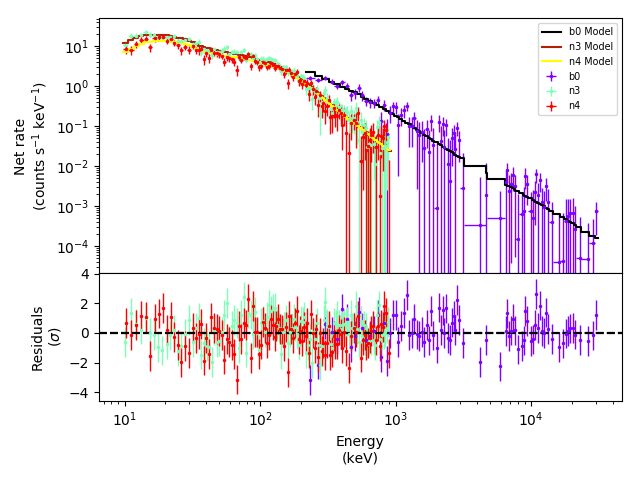


WARNING RuntimeWarning: invalid value encountered in divide



In [64]:
display_spectrum_model_counts(jl);

<IPython.core.display.Javascript object>


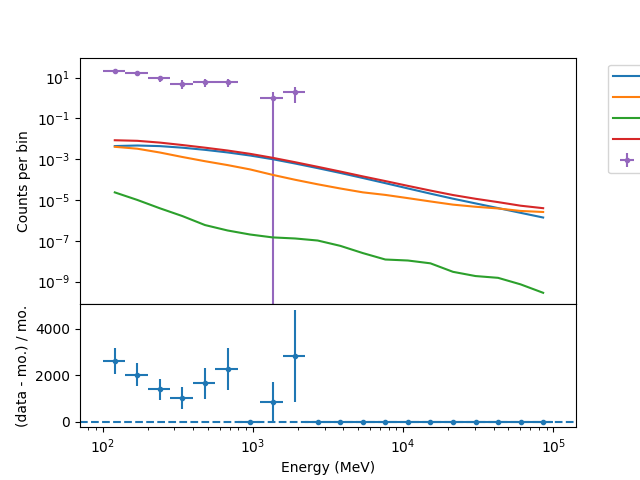

In [65]:
LAT.display();

 [*********************100%***********************]  20 of 20 completed in 4.0 s

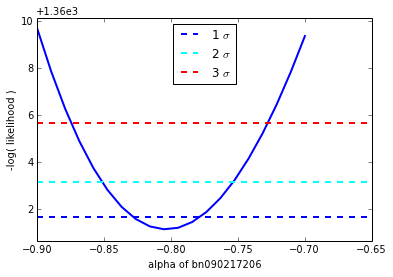

In [15]:
#We might also want to look at the profile of the likelihood for
#each parameter.

res = jl.get_contours('bn090217206','alpha',-0.9,-0.7,20)

 [*********************100%***********************]  400 of 400 completed in 54.6 s

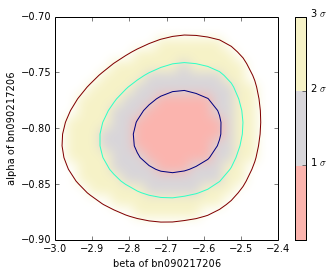

In [16]:
#Or we might want to produce a contour plot

res = jl.get_contours('bn090217206','alpha',-0.9,-0.7,20,'bn090217206','beta',-3.0,-2.4,20)

<h2>Full Bayesian analysis</h2>
<ul><li>
We used the model and the data list constructed before, so you need to go up and do those steps if you didn't already.</li></ul>

<ul><li>All the priors for all your parameters are already defined by default, you can check them like:</li></ul>

In [17]:
print(GRB.spectralModel)

Spectral model: Band function [Band et al. 1993]
Formula:



<IPython.core.display.Latex object>


Current parameters:



Name,Value,Minimum,Maximum,Delta,Status,Unit,Prior
alpha,-0.7,-2.0,2.0,0.08,free,,UniformPrior
beta,-2.4,-10.0,0.0,0.2,free,,UniformPrior
E0,380.448997283,10.0,100000.0,50.0,free,keV,UniformPrior
K,0.0197134523975,0.0001,1000.0,0.00193069772888,free,,LogUniformPrior


<li>Define the bayesian analysis in a similar way with which we defined the likelihood analysis:</li>

In [18]:
bayes = BayesianAnalysis(model, data_list)


Found Isotropic template for irf P7REP_SOURCE_V15: /home/giacomov/GlastExternals/diffuseModels/v2r0/iso_source_v05_rev1.txt

Found Galactic template for IRF. P7REP_SOURCE_V15: /home/giacomov/GlastExternals/diffuseModels/v2r0/gll_iem_v05_rev1.fit

Cutting the template around the ROI: 

Center is (1141.87815873,1140.83295959) pixel, (322.797269841,52.6041199485) sky
Approximating the X pixel: 1141.87815873 -> 1141
Approximating the Y pixel: 1140.83295959 -> 1140
X range -> 699 - 1585
Y range -> 901 - 1380
Input image shape is ([z],y,x) = (30, 1441, 2880)


<ul><li>Run the Markov Chain MC and explore the parameter space. For this simple case we assume you have run a likelihood fit before, so that the MCMC starts from a good point in the parameter space. Otherwise, if you are new to Bayesian analysis, be careful about the burn_in time and the convergence of the chain.</li></ul>

In [25]:
# Note that n_samples is the number of samples *per walker*, so you will get n_samples * n_walers samples
# at the end

samples = bayes.sample(n_walkers=20,burn_in=100, n_samples=1000)

Running burn-in of 100 samples...

 [*********************100%***********************]  100 of 100 completed in 4.7 s

Sampling...

 [*********************100%***********************]  1000 of 1000 completed in 46.2 s
Mean acceptance fraction: 0.58775


<h3>Getting some useful information from the Bayesian analysis</h3>
Now that we have our MCMC sample of parameters, we can extract a lot of useful information. We can start by computing the (equal-tail) credible intervals (the Bayesian equivalent of confidence intervals), based on the posterior samples:

In [26]:
credible_intervals = bayes.get_credible_intervals()

Name,Value,Unit
bn090217206_of_alpha,-0.80 -0.04 +0.04,
bn090217206_of_beta,-2.27 -0.15 +0.13,
bn090217206_of_E0,(4.8 -0.5 +0.6)e+02,keV
bn090217206_of_K,0.0183 -0.0008 +0.0008,


The dictionary can be used to access the numbers for later use:

In [21]:
# Get the lower bound, upper bound of the credible interval for alpha and the median

alpha_lower_bound = credible_intervals['bn090217206']['alpha']['lower bound']

alpha_upper_bound = credible_intervals['bn090217206']['alpha']['upper bound']

alpha_median = credible_intervals['bn090217206']['alpha']['median']

print("Credible interval for alpha: %s - %s" % (alpha_lower_bound, alpha_upper_bound))
print("Median for alpha: %s" % alpha_median)

Credible interval for alpha: -0.840958540453 - -0.751547970667
Median for alpha: -0.794744753552


You can also access the samples by using a dictionary access, such as:

In [22]:
alpha_samples = bayes.samples['bn090217206']['alpha']

or get all the samples as a matrix, useful if you want to use third-party software for futher processing:

In [23]:
my_samples = bayes.raw_samples

print(my_samples.shape)

(6000, 4)


We can also easily produce a triangle plot which show all the monodimensional and bidimensional marginal distribution, with the latter being the equivalent of countour plots in frequentist analysis:

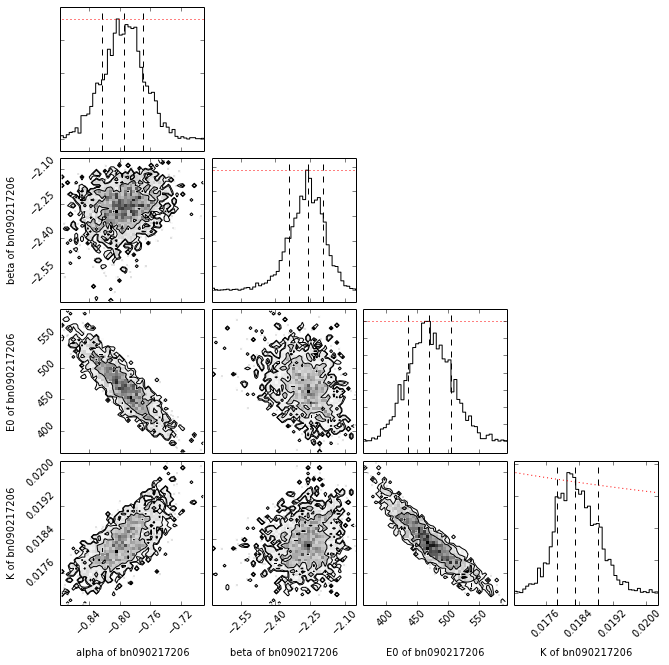

In [24]:
# (red lines in the marginal distributions are the priors)

corner_figure = bayes.corner_plot()